In [443]:
%pylab inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from methods import *

Populating the interactive namespace from numpy and matplotlib


/Users/teddiworledge/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['mean']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [444]:
#Loads files as dataframes
data_ent_followup = create_df("f_Sections F,G,h - Ent.dta", "Analysis files/data/Followup/{0}")

data_edu_baseline = create_df("education.dta", "Analysis files/data/Baseline/{0}")

data_ent_baseline = create_df("Sections F,G,h - Ent.dta", "Analysis files/data/Baseline/{0}")

data_age_baseline = create_df("personal info.dta", "Analysis files/data/Baseline/{0}")

In [445]:
#Removes attrition from the baseline dataframes
updated_edu_baseline = remove_attrition(data_edu_baseline, data_ent_followup)
updated_ent_baseline = remove_attrition(data_ent_baseline, data_ent_followup)
updated_age_baseline = remove_attrition(data_age_baseline, data_ent_followup)

Number of households at followup:  961
Number of households at adjusted baseline:  961
Number of households at followup:  961
Number of households at adjusted baseline:  961
Number of households at followup:  961
Number of households at adjusted baseline:  961


In [446]:
#Creates big array with the desired columns of edu_baseline, ent_baseline, and ent_followup.
#Contains the columns specified below.
#Corrects NaN values to zero.
ent_edu_master = updated_ent_baseline[['treatment_x', 'rescode', 'enterprise', 'soleent']].join(data_ent_followup[['f_enterprise', 'f_soleent']])
ent_edu_master = ent_edu_master.join(updated_edu_baseline[["edulow", "eduvoc", "eduhigh"]])
ent_edu_master = ent_edu_master.join(updated_age_baseline[["age"]])
ent_edu_master = ent_edu_master.fillna(0)

In [447]:
#Find number of participants in each age bin
ent_edu_master['age'] = ent_edu_master['age'].apply(lambda x: x//10)
ent_edu_master.loc[ent_edu_master.age==1, 'age'] = 2
ent_edu_master.loc[ent_edu_master.age==6, 'age'] = 5

for i in range(10):
    print(len(ent_edu_master.loc[ent_edu_master['age'] == i, :]))
    
ageBins = ['18-29', '30-39', '40-49', '50-69']

for i in range(2, 6):
    ent_edu_master.loc[ent_edu_master['age']==i, 'agebin'] = ageBins[i-2]

0
0
142
323
354
142
0
0
0
0


In [448]:
#control: treatment_x = 0
#individual: treatment_x = 1
#group: treatment_x = 2

In [449]:
#Copy of ent_edu_master for 'conversion rate' analysis, adds edu column, 
ent_edu_conv = ent_edu_master.copy()
ent_edu_conv['edu'] = ent_edu_conv['edulow'] + ent_edu_conv['eduvoc'] * 2 + ent_edu_conv['eduhigh'] * 3
treatment = 1
POSITIVE = False
#ent_edu_conv

In [450]:
#CONTROL: Create control ageGroup and eduGroup to use for subtraction
if POSITIVE:
    ageGroup4Controlled = pd.DataFrame(columns = ['age', 'agebins', 'conv. rate', 'mean', 'all people', 'people w/o BL soleent', 'fraction w/o BL soleent']) 
else:
    ageGroup4Controlled = pd.DataFrame(columns = ['age', 'agebins', 'conv. rate', 'mean', 'all people', 'people w/ BL soleent', 'fraction w/ BL soleent']) 
    
if POSITIVE:
    eduGroupControlled = pd.DataFrame(columns = ['edu', 'conv. rate', 'mean', 'all people', 'people w/o BL soleent', 'fraction w/o BL soleent']) 
else:
    eduGroupControlled = pd.DataFrame(columns = ['edu', 'conv. rate', 'mean', 'all people', 'people w/ BL soleent', 'fraction w/ BL soleent']) 

In [451]:
#CONTROL:Conversion rate chart with binning by age only 
for i in range(2, 6):
        ageGroup4Controlled = crTableAge(i, POSITIVE, 0, ent_edu_conv, ageGroup4Controlled)
cr = conversionRate(POSITIVE, ent_edu_conv[(ent_edu_conv.treatment_x == 0)])
ageGroup4Controlled

18-29
30-39
40-49
50-69


,age,agebins,conv. rate,mean,all people,people w/ BL soleent,fraction w/ BL soleent,agebin
0,2,NaN,0.666667,6.0,34,9,0.264706,18-29
1,3,NaN,0.424242,14.0,89,33,0.370787,30-39
2,4,NaN,0.428571,18.0,95,42,0.442105,40-49
3,5,NaN,0.315789,6.0,42,19,0.452381,50-69


In [452]:
#CONTROL: Conversion rate chart with binning by edu only 
# i, POSITIVE, treatment, ent_edu_conv, ageGroup4
for i in range(1, 4):
        eduGroupControlled = crTableEdu(i, POSITIVE, 0, ent_edu_conv, eduGroupControlled)
cr = conversionRate(POSITIVE, ent_edu_conv[(ent_edu_conv.treatment_x == 0)])
eduGroupControlled

,edu,conv. rate,mean,all people,people w/ BL soleent,fraction w/ BL soleent
0,1.0,0.538462,7.0,39.0,13.0,0.333333
1,2.0,0.421053,8.0,56.0,19.0,0.339286
2,3.0,0.408451,29.0,165.0,71.0,0.430303


In [453]:
#creates new data frame for 'conversion rate' analysis by separate age and edu binning
if POSITIVE:
    ageGroup4 = pd.DataFrame(columns = ['age', 'agebins', 'conv. rate', 'mean', 'all people', 'people w/o BL soleent', 'fraction w/o BL soleent']) 
else:
    ageGroup4 = pd.DataFrame(columns = ['age', 'agebins', 'conv. rate', 'mean', 'all people', 'people w/ BL soleent', 'fraction w/ BL soleent']) 
    
if POSITIVE:
    eduGroup = pd.DataFrame(columns = ['edu', 'conv. rate', 'mean', 'all people', 'people w/o BL soleent', 'fraction w/o BL soleent']) 
else:
    eduGroup = pd.DataFrame(columns = ['edu', 'conv. rate', 'mean', 'all people', 'people w/ BL soleent', 'fraction w/ BL soleent']) 

In [454]:
#Conversion rate chart with binning by age only 
for i in range(2, 6):
        ageGroup4 = crTableAge(i, POSITIVE, treatment, ent_edu_conv, ageGroup4)
cr = conversionRate(POSITIVE, ent_edu_conv[(ent_edu_conv.treatment_x == treatment)])
print("Conversion rate for age group 10 (aggregate) is:", cr)
ageGroup4

18-29
30-39
40-49
50-69
Conversion rate for age group 10 (aggregate) is: 0.40145985401459855


,age,agebins,conv. rate,mean,all people,people w/ BL soleent,fraction w/ BL soleent,agebin
0,2,NaN,0.478261,11.0,60,23,0.383333,18-29
1,3,NaN,0.487805,20.0,113,41,0.362832,30-39
2,4,NaN,0.301887,16.0,129,53,0.410853,40-49
3,5,NaN,0.400000,8.0,48,20,0.416667,50-69


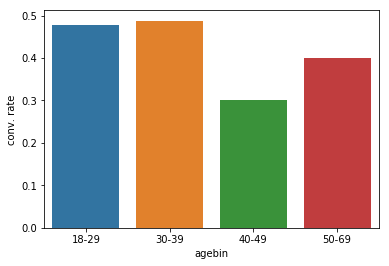

In [455]:
#age graph (not controlled)
ax = sns.barplot(x="agebin", y="conv. rate", data=ageGroup4)

In [456]:
#Conversion rate chart with binning by edu only 
# i, POSITIVE, treatment, ent_edu_conv, ageGroup4
for i in range(1, 4):
        eduGroup = crTableEdu(i, POSITIVE, treatment, ent_edu_conv, eduGroup)
cr = conversionRate(POSITIVE, ent_edu_conv[(ent_edu_conv.treatment_x == treatment)])
print("Conversion rate for edu level 4 (aggregate) is:", cr)
eduGroup

Conversion rate for edu level 4 (aggregate) is: 0.40145985401459855


,edu,conv. rate,mean,all people,people w/ BL soleent,fraction w/ BL soleent
0,1.0,0.578947,11.0,48.0,19.0,0.395833
1,2.0,0.346154,9.0,65.0,26.0,0.400000
2,3.0,0.380435,35.0,237.0,92.0,0.388186


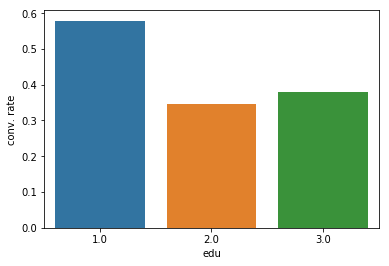

In [457]:
#edu graph (not controlled)
ax = sns.barplot(x="edu", y="conv. rate", data=eduGroup)

,age,agebins,conv. rate,mean,all people,people w/ BL soleent,fraction w/ BL soleent,agebin
0,2,NaN,-0.188406,6.0,34,9,0.264706,18-29
1,3,NaN,0.063562,14.0,89,33,0.370787,30-39
2,4,NaN,-0.126685,18.0,95,42,0.442105,40-49
3,5,NaN,0.084211,6.0,42,19,0.452381,50-69


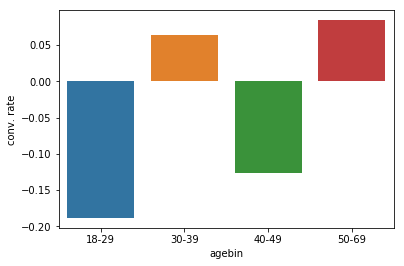

In [458]:
#CONTROLLED: age graph
ageGroup4Controlled['conv. rate'] = ageGroup4['conv. rate'] - ageGroup4Controlled['conv. rate']
ax = sns.barplot(x="agebin", y="conv. rate", data=ageGroup4Controlled)
ageGroup4Controlled

,edu,conv. rate,mean,all people,people w/ BL soleent,fraction w/ BL soleent
0,1.0,0.040486,7.0,39.0,13.0,0.333333
1,2.0,-0.074899,8.0,56.0,19.0,0.339286
2,3.0,-0.028016,29.0,165.0,71.0,0.430303


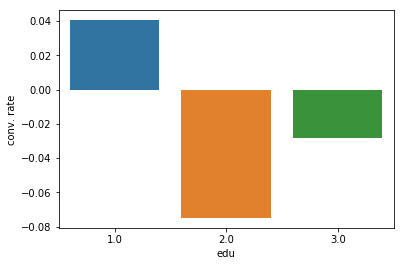

In [459]:
#CONTROLLED: edu graph
eduGroupControlled['conv. rate'] = eduGroup['conv. rate'] - eduGroupControlled['conv. rate']
ax = sns.barplot(x="edu", y="conv. rate", data=eduGroupControlled)
eduGroupControlled

In [460]:
#Conversion rate chart with binning by age AND edu
if POSITIVE:
    eduANDageGroup = pd.DataFrame(columns = ['edu', 'agebin', 'conv. rate', 'mean', 'all people', 'people w/o BL soleent', 'fraction w/o BL soleent']) 
else:
    eduANDageGroup = pd.DataFrame(columns = ['edu', 'agebin', 'conv. rate', 'mean', 'all people', 'people w/ BL soleent', 'fraction w/ BL soleent']) 

for i in range(2, 6):
    for j in range(1, 4):
        ap = len(ent_edu_conv[(ent_edu_conv.treatment_x == treatment)&(ent_edu_conv.age == i) & (ent_edu_conv.edu == j)])
        agebin = ent_edu_conv[(ent_edu_conv['age'] == i)].iloc[0]['agebin']
        if ap != 0:
            cr = conversionRate(POSITIVE, ent_edu_conv[(ent_edu_conv.treatment_x == treatment)&(ent_edu_conv.age == i) & (ent_edu_conv.edu == j)])
            if POSITIVE: #set baseline sample size to be number of people without soleent at baseline
                blSS = len(ent_edu_conv[(ent_edu_conv.treatment_x == treatment)&(ent_edu_conv.age == i) & (ent_edu_conv.edu == j) & (ent_edu_conv.soleent == 0)])
                pmf = binRanVarPMF(blSS, cr)
                eduANDageGroup = eduANDageGroup.append({'edu': j, 'agebin': agebin, 'conv. rate': cr, 'mean' : mean(pmf, blSS), 'all people' : ap, 'people w/o BL soleent':blSS, 'fraction w/o BL soleent' : blSS/ap}, ignore_index=True)
            else: #set baseline sample size to be number of people with soleent at baseline
                blSS = len(ent_edu_conv[(ent_edu_conv.treatment_x == treatment)&(ent_edu_conv.age == i) & (ent_edu_conv.edu == j) & (ent_edu_conv.soleent == 1)])
                pmf = binRanVarPMF(blSS, cr)
                eduANDageGroup = eduANDageGroup.append({'edu': j, 'agebin': agebin, 'conv. rate': cr, 'mean' : mean(pmf, blSS), 'all people' : ap, 'people w/ BL soleent':blSS, 'fraction w/ BL soleent' : blSS/ap}, ignore_index=True)
        else:
            eduANDageGroup = eduANDageGroup.append({'edu': j, 'agebin': agebin, 'conv. rate': 0, 'mean' : 0, 'all people' : 0, 'people w/o BL soleent':0, 'fraction w/o BL soleent' : 0}, ignore_index=True)

eduANDageGroup

,edu,agebin,conv. rate,mean,all people,people w/ BL soleent,fraction w/ BL soleent
0,1,18-29,0.625000,5.0,17,8,0.470588
1,2,18-29,0.000000,0.0,2,1,0.500000
2,3,18-29,0.428571,6.0,41,14,0.341463
3,1,30-39,0.500000,1.0,5,2,0.400000
4,2,30-39,0.714286,5.0,23,7,0.304348
5,3,30-39,0.437500,14.0,85,32,0.376471
6,1,40-49,0.428571,3.0,13,7,0.538462
7,2,40-49,0.181818,2.0,30,11,0.366667
8,3,40-49,0.314286,11.0,86,35,0.406977
9,1,50-69,1.000000,2.0,13,2,0.153846


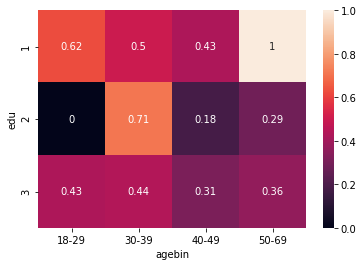

In [461]:
eduANDageGroupGraphing = eduANDageGroup.pivot("edu", "agebin", "conv. rate")
ax = sns.heatmap(eduANDageGroupGraphing, annot=True)